# Medical Costs case study - solution

In [1]:
import pandas as pd
import seaborn as sns

# Section 1

## Get the data and examine it

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## How is age related to medical costs?

<AxesSubplot:xlabel='age', ylabel='charges'>

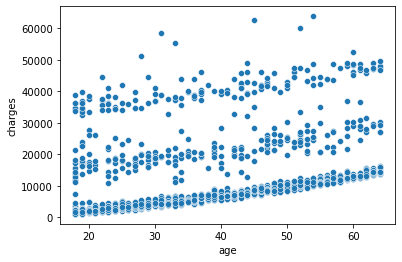

In [6]:
sns.scatterplot(data=df, x='age', y='charges')

### As age goes up so do medical costs

## How is number of children related to medical costs?

In [7]:
children = df.groupby('children').mean()[['charges']].reset_index()
children

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


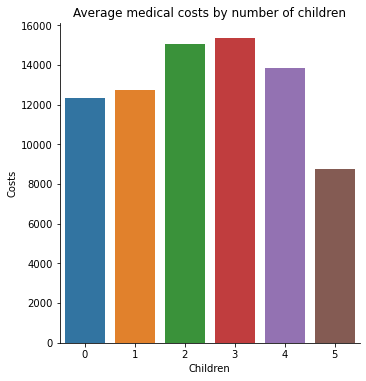

In [8]:
g = sns.catplot(data=children, kind='bar', x='children', y='charges')

for ax in g.axes.flat:
    ax.set(title='Average medical costs by number of children',
           ylabel='Costs',
           xlabel='Children')

### The plot above shows how costs relate to the number of children

In [9]:
df.groupby('children').count()[['age']]

,age
children,
0,574
1,324
2,240
3,157
4,25
5,18


## How is the number of people distributed by region?

In [10]:
df.groupby('region').count()[['charges']]

,charges
region,
northeast,324
northwest,325
southeast,364
southwest,325


<AxesSubplot:ylabel='region'>

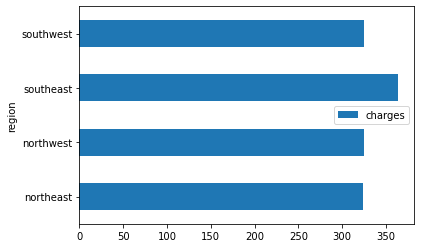

In [11]:
df.groupby('region').count()[['charges']].plot(kind='barh')

### The number of people sampled from each region is roughly equal, but there is slightly more in the southeast

## How is the number of people distributed by age?

<AxesSubplot:ylabel='Density'>

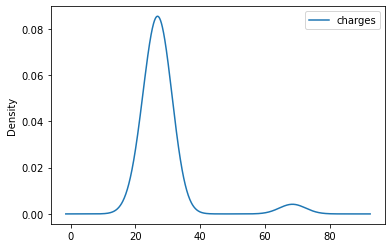

In [12]:
df.groupby('age').count()[['charges']].plot(kind='kde')

### Most people are between 20 and 40 with another cluster between 60 and 80

## How are the charges distributed?

In [13]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:ylabel='Density'>

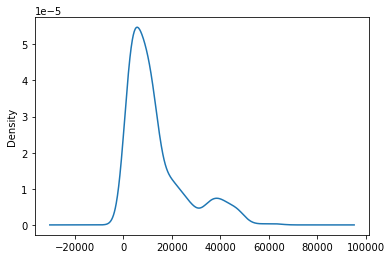

In [14]:
df.charges.plot(kind='kde')

### Most charges are less than 20,000 but the charges range up to about 63,000